## Texturas

===== MÉTRICAS DE TEXTURA (GLCM) =====
Contraste: 1347.1315
Homogeneidad: 0.8904
Energía: 0.8145
Correlación: 0.8726


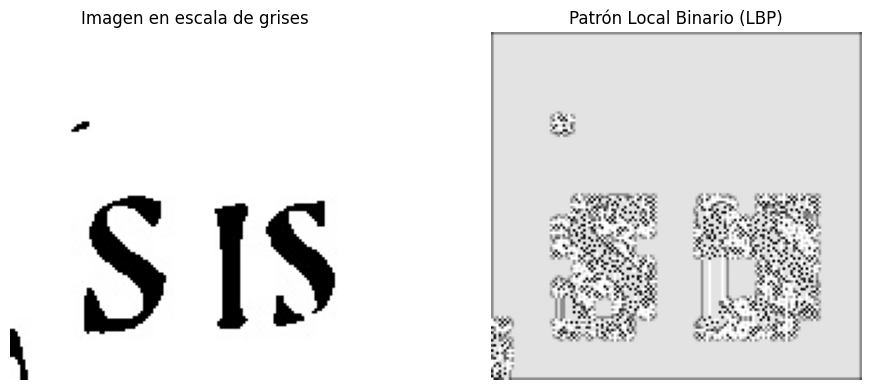

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern, graycomatrix, graycoprops

# =============================
#  1. Cargar y preprocesar imagen
# =============================

# Cargar la imagen original
img = cv2.imread('resultados/5_morfologia.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar filtros para reducción de ruido y mejora de bordes
median = cv2.medianBlur(gray, 3)
bilateral = cv2.bilateralFilter(median, d=9, sigmaColor=75, sigmaSpace=75)

# Binarización con Otsu
_, thresh = cv2.threshold(bilateral, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Operación morfológica para limpiar pequeñas imperfecciones
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# =============================
#  2. Extracción de características (Textura)
# =============================

# --- A. LBP (Local Binary Pattern) ---
lbp = local_binary_pattern(gray, P=8, R=1, method='uniform')

# --- B. GLCM (Haralick Features) ---
glcm = graycomatrix(gray, distances=[1], angles=[0], symmetric=True, normed=True)

contrast = graycoprops(glcm, 'contrast')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

print("===== MÉTRICAS DE TEXTURA (GLCM) =====")
print(f"Contraste: {contrast:.4f}")
print(f"Homogeneidad: {homogeneity:.4f}")
print(f"Energía: {energy:.4f}")
print(f"Correlación: {correlation:.4f}")
print("=====================================")

# =============================
#  3. Visualización
# =============================
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Imagen en escala de grises")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title("Patrón Local Binario (LBP)")
plt.axis('off')

plt.tight_layout()
plt.show()

# =============================
#  4. Guardado de resultados
# =============================

# Guardar mapa de texturas (LBP)
lbp_normalized = (lbp * 255 / lbp.max()).astype(np.uint8)
cv2.imwrite('resultados/lbp_textura.jpg', lbp_normalized)

# Guardar métricas GLCM en un archivo de texto
with open('resultados/GLCM_resultados.txt', 'w') as f:
    f.write("===== MÉTRICAS DE TEXTURA (GLCM) =====\n")
    f.write(f"Contraste: {contrast:.4f}\n")
    f.write(f"Homogeneidad: {homogeneity:.4f}\n")
    f.write(f"Energía: {energy:.4f}\n")
    f.write(f"Correlación: {correlation:.4f}\n")
    f.write("=====================================\n")



## Deteción de bordes

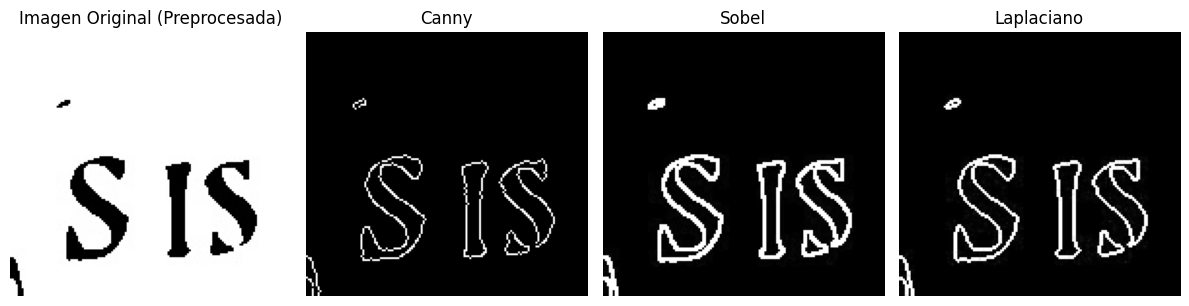

True

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# --- 1. Cargar imagen preprocesada ---
img = cv2.imread('resultados/5_morfologia.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- 2. Detección de bordes ---

# Canny
edges_canny = cv2.Canny(gray, threshold1=50, threshold2=150)

# Sobel (gradiente en X e Y)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)

# Laplaciano (segunda derivada)
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# --- 3. Mostrar resultados ---
titles = ['Imagen Original (Preprocesada)', 'Canny', 'Sobel', 'Laplaciano']
images = [gray, edges_canny, sobel, laplacian]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
# --- Crear carpeta si no existe ---
output_dir = "resultados/bordes"
os.makedirs(output_dir, exist_ok=True)

# --- Guardar imágenes ---
cv2.imwrite(os.path.join(output_dir, "bordes_canny.jpg"), edges_canny)
cv2.imwrite(os.path.join(output_dir, "bordes_sobel.jpg"), sobel)
cv2.imwrite(os.path.join(output_dir, "bordes_laplaciano.jpg"), laplacian)


## Formas

Contorno: Área=52.00, Perímetro=60.63
Contorno: Área=109.00, Perímetro=46.14
Contorno: Área=482.00, Perímetro=127.46
Contorno: Área=595.00, Perímetro=156.02
Contorno: Área=918.50, Perímetro=249.87
Contorno: Área=30.50, Perímetro=23.07


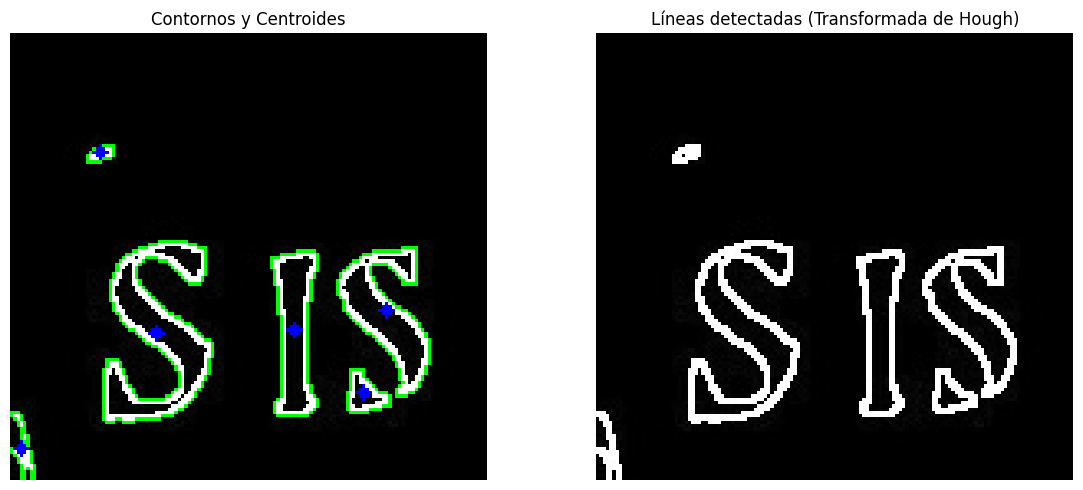

✅ Imágenes de detección de formas guardadas en 'resultados/formas/'


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# --- 1. Cargar imagen preprocesada ---
img = cv2.imread('resultados/bordes/bordes_sobel.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- 2. Binarización para detectar formas ---
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# --- 3. Encontrar contornos ---
contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# --- 4. Dibujar contornos ---
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 1)

# --- 5. Calcular momentos y centroides ---
for c in contours:
    M = cv2.moments(c)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.circle(img_contours, (cx, cy), 2, (255, 0, 0), -1)  # marcar centro
        area = cv2.contourArea(c)
        perimeter = cv2.arcLength(c, True)
        print(f"Contorno: Área={area:.2f}, Perímetro={perimeter:.2f}")

# --- 6. (Opcional) Transformada de Hough para líneas ---
edges = cv2.Canny(gray, 100, 200)
lines = cv2.HoughLines(edges, 1, np.pi/180, 100)
img_hough = img.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_hough, (x1, y1), (x2, y2), (0, 0, 255), 1)

# --- 7. Mostrar resultados ---
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("Contornos y Centroides")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_hough, cv2.COLOR_BGR2RGB))
plt.title("Líneas detectadas (Transformada de Hough)")
plt.axis('off')

plt.tight_layout()
plt.show()

# --- 8. Guardar resultados ---
output_dir = "resultados/formas"
os.makedirs(output_dir, exist_ok=True)
cv2.imwrite(os.path.join(output_dir, "contornos_centroides.jpg"), img_contours)
cv2.imwrite(os.path.join(output_dir, "lineas_hough.jpg"), img_hough)

